# Modeling Phase

### Load Python modules

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

plt.style.use('ggplot')

In [ ]:
dt_cleaned_v = pd.read_csv('dt_cleaned_v.csv', sep=',')
dt_cleaned_v

,age_cat,ethnicity,is_violent_recid,sex,v_score_text
0,adult,African-American,1,Male,Low
1,young,African-American,0,Male,Low
2,adult,Caucasian,0,Male,Low
3,young,Caucasian,1,Male,Medium
4,young,African-American,0,Male,Low
...,...,...,...,...,...
3696,young,Caucasian,0,Female,Low
3697,adult,Caucasian,0,Male,Low
3698,young,African-American,0,Male,Medium
3699,senior,African-American,0,Male,Low


### Check Attribute types

In [4]:
dt_cleaned_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_cat           3701 non-null   object
 1   ethnicity         3701 non-null   object
 2   is_violent_recid  3701 non-null   int64 
 3   sex               3701 non-null   object
 4   v_score_text      3701 non-null   object
dtypes: int64(1), object(4)
memory usage: 144.7+ KB


In [5]:
dt_cleaned_v['age_cat'] = dt_cleaned_v['age_cat'].astype('category')
dt_cleaned_v['ethnicity'] = dt_cleaned_v['ethnicity'].astype('category')
dt_cleaned_v['v_score_text'] = dt_cleaned_v['v_score_text'].astype('category')
dt_cleaned_v['sex'] = dt_cleaned_v['sex'].astype('category')
dt_cleaned_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age_cat           3701 non-null   category
 1   ethnicity         3701 non-null   category
 2   is_violent_recid  3701 non-null   int64   
 3   sex               3701 non-null   category
 4   v_score_text      3701 non-null   category
dtypes: category(4), int64(1)
memory usage: 44.1 KB


#### Add dummies instead of categorical attributes

In [6]:
number = preprocessing.LabelEncoder()
for attribute in dt_cleaned_v.columns:
    if dt_cleaned_v[attribute].dtype.name == "category":
        dt_cleaned_v[attribute] = number.fit_transform(dt_cleaned_v[attribute])

### Check if the dataset is balanced

In [7]:
dt_cleaned_v['is_violent_recid'].value_counts()

0    2819
1     882
Name: is_violent_recid, dtype: int64

Resample Algorithm is needed.

### Split Dataset into Training Set and Test Set

In [8]:
X = dt_cleaned_v.drop('is_violent_recid', axis=1)
y = dt_cleaned_v['is_violent_recid']

seed = 100
test_size= 0.25
# 75% train set, 25% test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

training_set = pd.concat([X_train, y_train], axis=1)
violent_recid = training_set[training_set.is_violent_recid==1]
not_violent_recid = training_set[training_set.is_violent_recid==0]

In [9]:
violent_recid.shape

(656, 5)

In [10]:
not_violent_recid.shape

(2119, 5)

#### Perform Oversampling

In [11]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [12]:
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

#### Build different models and evaluate them using three metrics: *accuracy*, *recall* and *precision*

In [13]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

#### Find the best parameters

##### Decision Tree

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_leaf_nodes': [None, 5, 10, 15],
    'random_state': [None, 1, 2, 3, 4, 5]
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 10, 'random_state': 1, 'splitter': 'random'}


In [15]:
knn_params = {
    'n_neighbors':  [1, 2, 3, 4, 5]
}

knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

knn.fit(X_train, y_train)
print(knn.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_neighbors': 2}


In [16]:
rf_params = {
    'random_state':  [10, 20, 30, 40, 50]
}

rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

rf.fit(X_train, y_train)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'random_state': 50}


In [17]:
ab_params = {
    'random_state':  [70, 90, 110, 130]
}

ab = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=ab_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

ab.fit(X_train, y_train)
print(ab.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'random_state': 70}


In [18]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10, max_depth=None, max_leaf_nodes=15)))
models.append(("KNeighborsClassifier", KNeighborsClassifier(1)))
models.append(("Random Forest", RandomForestClassifier(random_state=10)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=70)))

for name, model in models:
  model.fit(X_train_SMOTE, y_train_SMOTE)
  predictions = model.predict(X_test)
  print(f'{name}:\n')
  print(f'Accuracy: {metrics.accuracy_score(y_test, predictions):.4f}')
  print(f'Recall: {metrics.recall_score(y_test, predictions):.4f}')
  print(f'Precision: {metrics.precision_score(y_test, predictions):.4f}')
  print(f'F-measure: {metrics.f1_score(y_test, predictions):.4f}\n')

Naive Bayes:

Accuracy: 0.6026
Recall: 0.3717
Precision: 0.2710
F-measure: 0.3134

DecisionTreeClassifier:

Accuracy: 0.5389
Recall: 0.5044
Precision: 0.2657
F-measure: 0.3481

KNeighborsClassifier:

Accuracy: 0.5756
Recall: 0.3584
Precision: 0.2462
F-measure: 0.2919

Random Forest:

Accuracy: 0.5518
Recall: 0.4292
Precision: 0.2533
F-measure: 0.3186

AdaBoost:

Accuracy: 0.6220
Recall: 0.3628
Precision: 0.2847
F-measure: 0.3191



### Evaluation - K-Nearest-Neighbors

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
model = KNeighborsClassifier(5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.72


In [21]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sn.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

#### Confusion Matrix

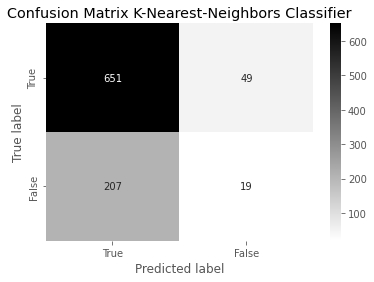

In [22]:
categories = ['True', 'False']
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary', title='Confusion Matrix K-Nearest-Neighbors Classifier')

#### Classification Report

In [23]:
print("Classification Report - K-Nearest-Neighbors Classifier")
print(metrics.classification_report(y_test, predictions))

Classification Report - K-Nearest-Neighbors Classifier
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       700
           1       0.28      0.08      0.13       226

    accuracy                           0.72       926
   macro avg       0.52      0.51      0.48       926
weighted avg       0.64      0.72      0.66       926



#### ROC Curve

In [24]:
from sklearn.metrics import roc_curve, auc

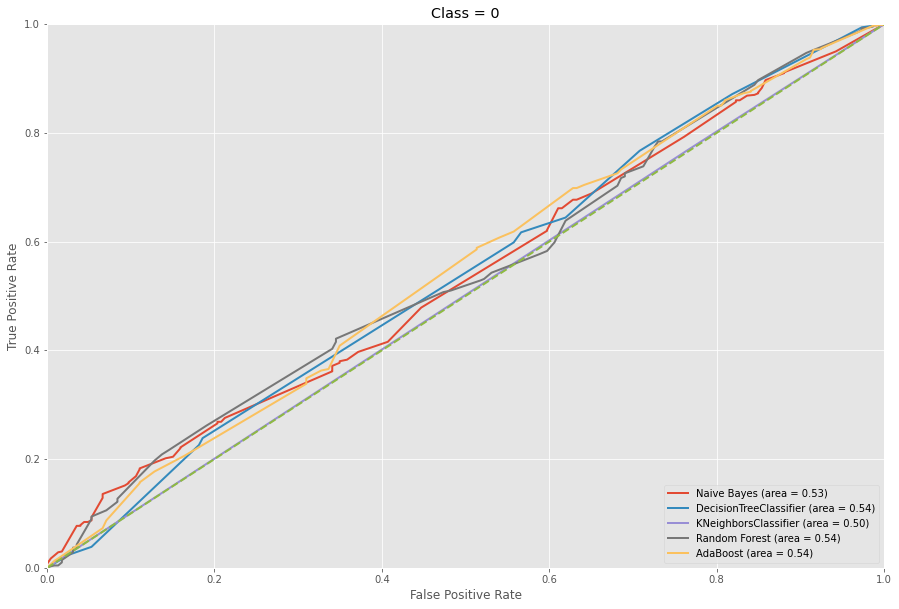

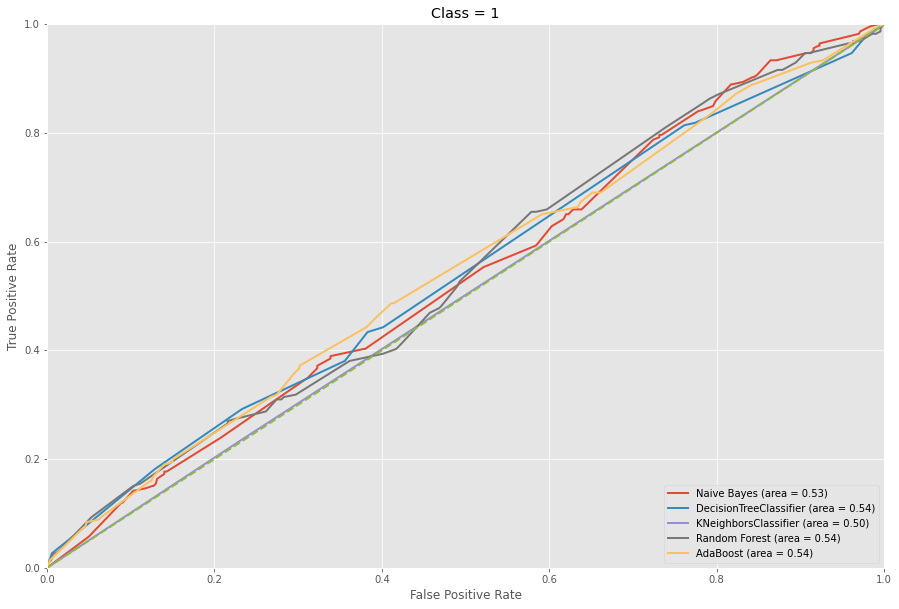

In [25]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['is_violent_recid']))

probs = []

for _, model in models:
    model.fit(X_train, y_train)
    probs.append(model.predict_proba(X_test))
    
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure(figsize=(15,10))
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=2, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()

Comparison between KNN and AdaBoost

In [26]:
model = AdaBoostClassifier(random_state=110)
model.fit(X_train_SMOTE,y_train_SMOTE)
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.62


In [27]:
print("Classification Report - Ada Boost Classifier")
print(metrics.classification_report(y_test, predictions))

Classification Report - Ada Boost Classifier
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       700
           1       0.28      0.36      0.32       226

    accuracy                           0.62       926
   macro avg       0.53      0.53      0.53       926
weighted avg       0.65      0.62      0.64       926



We noticed that, although the AUC is higher for AdaBoost classifier, if we look at the F1-measure value, the best model for Classification equal to 1 (ndr violent recidivist) is KNN.